# Zomato Data Analytics

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Zomato data .csv')

In [15]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [10]:
df["rate"] = df["rate"].apply(lambda value:float(str(value).split("/")[0]))
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


## Converting the data of rating

In [19]:
df["rate"] = df["rate"].apply(lambda value:float(str(value).split("/")[0]))
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


### Q1: What type of restaurant do the majority of customers order form ?

In [33]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


In [21]:
df["listed_in(type)"].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

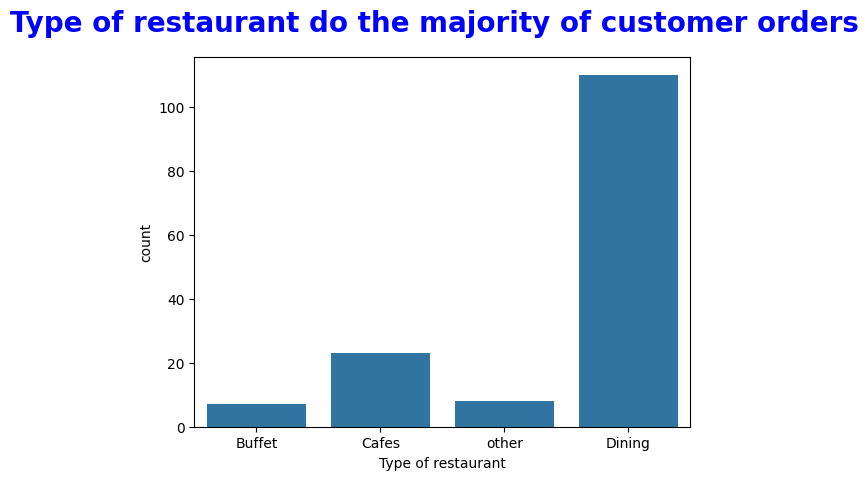

In [28]:
sns.countplot(data=df,x="listed_in(type)")
plt.xlabel("Type of restaurant")

plt.suptitle("Type of restaurant do the majority of customer orders",fontsize=20,color="b",fontweight="bold")
plt.show()

##### Conclusion - Dining restaurant do the majority of customer orders.

### Q2: How many votes has each type of restaurant recevied from customers ?

In [34]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


In [29]:
grouped_data = df.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes":grouped_data})
result.sort_values(by=["votes"],ascending=False)

,votes
listed_in(type),
Dining,20363
other,9367
Cafes,6434
Buffet,3028


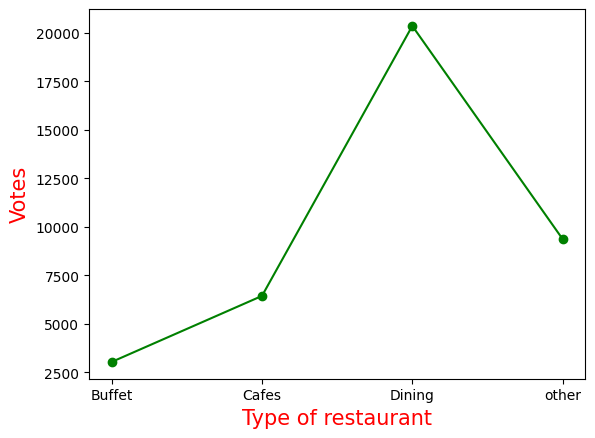

In [32]:
plt.plot(result,c="g",marker="o")
plt.xlabel("Type of restaurant",c="r",size=15)
plt.ylabel("Votes",c="r",size=15)
plt.show()

##### Conclusion - Dining restaurants has recieved maximum votes

### Q3: What are the rating that the majority of restaurants have received ?

In [35]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


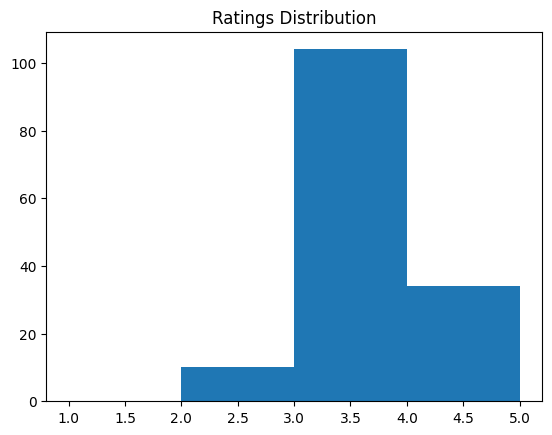

In [36]:
plt.hist(df["rate"],bins=[1,2,3,4,5])
plt.title("Ratings Distribution")
plt.show()

##### Conclusion - The majority restaurants received ratings from 3 to 4

### Q4: Zomato has observed that most couples order most of their food online. What is their average spending on each order ?

In [37]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


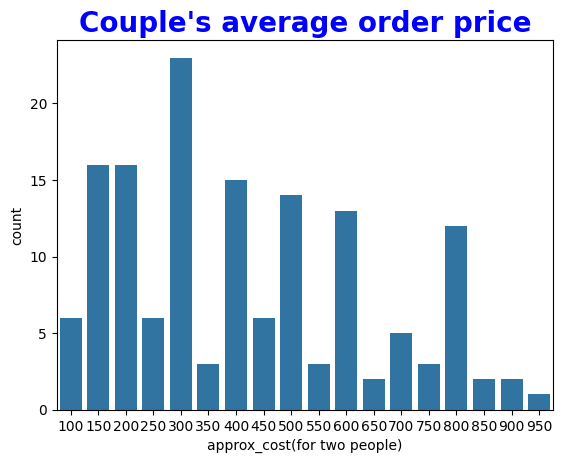

In [38]:
sns.countplot(data=df,x="approx_cost(for two people)")
plt.title("Couple's average order price",fontdict={"fontsize":20,"color":"blue","fontweight":"bold"})
plt.show()

##### Conclusion - The majority of couples prefer restaurants with an approximate cost of 300 rupees

### Q5: Which mode (online or offline) has recevied the maximum rating ?

In [39]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


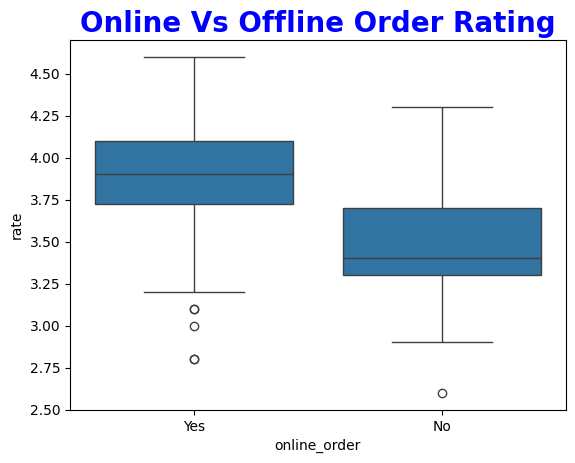

In [40]:
sns.boxplot(data=df,x="online_order",y="rate")
plt.title("Online Vs Offline Order Rating",fontdict={"fontsize":20,"color":"blue","fontweight":"bold"})
plt.show()

#### Conclusion - Offline order received lower rating in comparison to online order

### Q6: Which type of restaurant received more offline orders, so that Zomato can provide customers with some good offers ? 

In [41]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


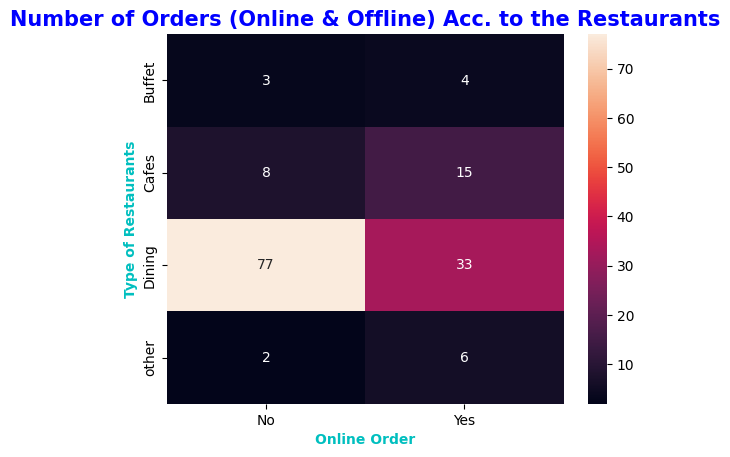

In [42]:
pivot_table = df.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size")
sns.heatmap(pivot_table,annot=True)
plt.title("Number of Orders (Online & Offline) Acc. to the Restaurants",fontdict={"fontsize":15,"color":"blue","fontweight":"bold"})
plt.xlabel("Online Order",fontdict={"fontsize":10,"color":"c","fontweight":"bold"})
plt.ylabel("Type of Restaurants",fontdict={"fontsize":10,"color":"c","fontweight":"bold"})
plt.show()

##### Conclusion - Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders.This suggests that clients preference orders in person at restaurants, but prefer online ordering at cafes.